In [1]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


from hpt import utils
from hpt import plotting

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.metrics import auc, roc_curve

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

['pT_xjj0p9_newweight.png', 'PT_xbb0p95_reweighted.png', 'output_xbb0p7.png', 'GESA Constitution 2022-23.docx', 'outparquet', 'output_xbb0p95.png', '.DS_Store', '0-1.parquet', 'ROC_curves.ipynb', 'LICENSE', 'requirements.txt', 'ZJets.ipynb', 'mSD_xjj0p9_newweight.png', 'output_xjj0p7.png', 'Discriminators.ipynb', 'pyproject.toml', 'mSD_xbb0p9_reweighted.png', '2022.University Salsa Club.Constitution.docx', 'mSD_xbb0p95_reweighted.png', '.sites_map.json', 'output_xbb0p95_nokfactor.png', 'PT_xjj0p9_reweighted.png', 'mSD_xbb0p7_reweighted.png', 'README.md', 'output_xbb0p7_nokfactor.png', 'output_xbb0p95_kfactor.png', 'output_xjj0p7_nokfactor.png', '.gitignore', 'output_xjj0p95.png', 'output_xjj0p9.png', 'print_parquet.py', 'outfiles', 'mSD_xjj0p9_reweighted.png', 'PT_xbb0p7_reweighted.png', '.git', 'data', 'output_xjj0p95_nokfactor.png', 'PT_xbb0p9_reweighted.png', 'output_xbb0p9.png', 'HiggsDiscriminators.ipynb', 'mSDplot.ipynb', 'AirMedia_172.28.36.79.dmg', 'ShipperLabel', 'GESA Constit

In [2]:
MAIN_DIR = "/Users/gbibim/Here/genZ/data"
#dir_name = "children" #"new"  # data for older samples new for the files with lhe variables
dir_name = "PNetchildren" 
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
year = "2023"  

# Define the samples and the directories where they are stored
samples = {
    "Zto2Q": [
        "Zto2Q-2Jets_PTQQ-100to200_1J",
        "Zto2Q-2Jets_PTQQ-100to200_2J",
        "Zto2Q-2Jets_PTQQ-200to400_1J",
        "Zto2Q-2Jets_PTQQ-200to400_2J",
        "Zto2Q-2Jets_PTQQ-400to600_1J",
        "Zto2Q-2Jets_PTQQ-400to600_2J",
        "Zto2Q-2Jets_PTQQ-600_1J",
        "Zto2Q-2Jets_PTQQ-600_2J",
        ],
    
    
    "Wto2Q":[
        "Wto2Q-2Jets_PTQQ-100to200_1J",
        "Wto2Q-2Jets_PTQQ-100to200_2J",
        "Wto2Q-2Jets_PTQQ-200to400_1J",
        "Wto2Q-2Jets_PTQQ-200to400_2J",
        "Wto2Q-2Jets_PTQQ-400to600_1J",
        "Wto2Q-2Jets_PTQQ-400to600_2J",
        "Wto2Q-2Jets_PTQQ-600_1J",
        "Wto2Q-2Jets_PTQQ-600_2J",
        ],
        
    "Diboson": {
        "ZZ",
        "WZ",
        "WW",
        "WWto4Q",       
    },

    "TT": {
        "TTto4Q",
        "TTto2L2Nu",
        "TTtoLNu2Q",
    },

    "QCD": {
        "QCD_HT-40to70",
        "QCD_HT-70to100",
        "QCD_HT-100to200",
        "QCD_HT-200to400",
        "QCD_HT-400to600",
        "QCD_HT-600to800",
        "QCD_HT-800to1000",
        "QCD_HT-1000to1200",
        "QCD_HT-1200to1500",
        "QCD_HT-1500to2000",
    },

    "data": {
        "JetMET_Run2023Cv1",
        "JetMET_Run2023Cv2",
        "JetMET_Run2023Cv3",
        "JetMET_Run2023Cv4",
    },
    "ggH": {
        "GluGluHto2B_M-125",
    },
    "WH": {
        "WminusH_Hto2B_Wto2Q_M-125",
        "WminusH_Hto2B_WtoLNu_M-125",
        "WplusH_Hto2B_Wto2Q_M-125",
        "WplusH_Hto2B_WtoLNu_M-125",
    },
    "ZH": {
        "ZH_Hto2B_Zto2Q_M-125",
        "ZH_Hto2B_Zto2L_M-125",
        "ZH_Hto2B_Zto2Nu_M-125",
        "ggZH_Hto2B_Zto2L_M-125",
        "ggZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2Nu_M-125",
    },
    "ttH": {    
        "ttHto2B_M-125",
    },

    "VBF": {
        "VBFHto2B_M-125",
    },
    "higgs": {
        "GluGluHto2B_M-125",
        "WminusH_Hto2B_Wto2Q_M-125",
        "WminusH_Hto2B_WtoLNu_M-125",
        "WplusH_Hto2B_Wto2Q_M-125",
        "WplusH_Hto2B_WtoLNu_M-125",
        "ZH_Hto2B_Zto2Q_M-125",
        "ZH_Hto2B_Zto2L_M-125",
        "ZH_Hto2B_Zto2Nu_M-125",
        "ggZH_Hto2B_Zto2L_M-125",
        "ggZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2Nu_M-125",
        "ttHto2B_M-125",
        "VBFHto2B_M-125",
    },
  
}

dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    #("GenVPt", 1),
    ("ak8FatJetPt", 1),
    ("ak8FatJetmsoftdrop", 1),
    ("ak8FatJetPNetMass", 1),
    #("ak8FatJetPNetTXbb", 2),
    #("ak8FatJetPNetTXjj", 2),
    #("ak8FatJetPNetTXcc", 2),
    #("ak8FatJetPNetQCD", 2),
    #("ak8FatJetPNetTXgg", 2),
    ('ak8FatJetParTPQCD1HF', 1),
    ('ak8FatJetParTPQCD2HF', 1),
    ('ak8FatJetParTPQCD0HF', 1),
    ('ak8FatJetParTPXbb', 1),
    ('ak8FatJetParTPXcc', 1),
    ('ak8FatJetParTPXcs', 1),
    ('ak8FatJetParTPXgg', 1),
    ('ak8FatJetParTPXqq', 1),
]

load_V = load_columns + [("bbFatJetVMatch", 1)]
load_H = load_columns + [("bbFatJetHiggsMatch", 1)]
    


In [3]:
signal = "Zto2Q"
background = "QCD"
jet_collection = "ak8FatJet"
discriminator_name = "ParTTXbb"
discriminator = f"{jet_collection}{discriminator_name}"
pt_cut = [200, 1000]
msd_cut = [40, 200]
mreg_cut = None

events_dict = {
    signal: {},
    background: {},
}
#events_dict[signal] = {}
for which in [signal, background]:
    events_dict[which] = {}
    for input_dir, dirs_samples in dirs.items():
            # Loop through each sample individually to avoid loading everything at once
        for sample in samples[which]:
            try:
                # Load only one sample at a time
                events_dict[which] = {
                    **events_dict[which],
                    **utils.load_samples(
                        input_dir,
                        which,
                        [sample],  # List containing a single sample
                        year,
                        columns=utils.format_columns(
                            load_V if which in {"Zto2Q", "Wto2Q"} else load_columns
                    ),
                )
                }

            except KeyError as e:
                print(f"Warning: Missing key {e} in sample {sample}. Skipping.")


sample_name Zto2Q-2Jets_PTQQ-100to200_1J
Loading Zto2Q-2Jets_PTQQ-100to200_1J
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 942 entries
sample_name Zto2Q-2Jets_PTQQ-100to200_2J
Loading Zto2Q-2Jets_PTQQ-100to200_2J
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      : 358821 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_1J
Loading Zto2Q-2Jets_PTQQ-200to400_1J
Loaded Zto2Q-2Jets_PTQQ-200to400_1J                      : 2101989 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_2J
Loading Zto2Q-2Jets_PTQQ-200to400_2J
Loaded Zto2Q-2Jets_PTQQ-200to400_2J                      : 4993634 entries
sample_name Zto2Q-2Jets_PTQQ-400to600_1J
Loading Zto2Q-2Jets_PTQQ-400to600_1J
Loaded Zto2Q-2Jets_PTQQ-400to600_1J                      : 1136172 entries
sample_name Zto2Q-2Jets_PTQQ-400to600_2J
Loading Zto2Q-2Jets_PTQQ-400to600_2J
Loaded Zto2Q-2Jets_PTQQ-400to600_2J                      : 1659970 entries
sample_name Zto2Q-2Jets_PTQQ-600_1J
Loading Zto2Q-2Jets_PTQQ-600_1J
Loaded Zto2Q-2Jets_

/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample QCD_HT-40to70.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


Loaded QCD_HT-1000to1200                                 : 28209931 entries
sample_name QCD_HT-1500to2000
Loading QCD_HT-1500to2000
Loaded QCD_HT-1500to2000                                 : 38199880 entries
sample_name QCD_HT-600to800
Loading QCD_HT-600to800
Loaded QCD_HT-600to800                                   : 15614262 entries
sample_name QCD_HT-70to100


/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample QCD_HT-70to100.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


In [ ]:
def get_roc_inputs(
    events_dict,
    jet_collection,
    discriminator_name,
    jet_index,
):
    sig_key = signal
    bg_keys = [background]
    discriminator = f"{jet_collection}{discriminator_name}"

    # Filter events where bbFatJetVMatch == 1
    #events_dict = {
    #    key: events[events[f"bbFatJetVMatch"] == 1] for key, events in events_dict.items()
    #}
    # Filter signal events based on bbFatJetVMatch == 1
    signal_events_filtered = events_dict[sig_key][events_dict[sig_key]["bbFatJetVMatch"][0] == 1]


    # 1 for signal, 0 for background
    y_true = np.concatenate(
        [
            #np.ones(len(events_dict[sig_key])),
            np.ones(len(signal_events_filtered)),
            np.zeros(sum(len(events_dict[bg_key]) for bg_key in bg_keys)),
        ]
    )
    # weights
    weights = np.concatenate(
        #[events_dict[sig_key]["finalWeight"]]
        [signal_events_filtered["finalWeight"]]
        + [events_dict[bg_key]["finalWeight"] for bg_key in bg_keys],
    )
    # discriminator
    scores = np.concatenate(
        #[events_dict[sig_key][discriminator][jet_index]]
        #+ [events_dict[bg_key][discriminator][jet_index] for bg_key in bg_keys],

        #[events_dict[sig_key][discriminator]]
        [signal_events_filtered[discriminator]]
        + [events_dict[bg_key][discriminator] for bg_key in bg_keys],
    )

    valid_indices = np.isnan(scores) & np.isinf(scores)
    pt = scores[valid_indices]
    y_true = y_true[valid_indices]  # Make sure y_true matches the valid scores
    weights = weights[valid_indices]  # If weights are involved

    # Check for NaN or Inf values in scores
    if np.any(np.isnan(scores)):
        print("NaN values found in scores.")
    if np.any(np.isinf(scores)):
        print("Infinite values found in scores.")

    # Deal with NaN and Inf values
    scores = np.nan_to_num(scores, nan=0.0)  # Replace NaN with 0

    #OR
    # Check for NaNs or Inf values in scores
    #if np.any(np.isnan(scores)) or np.any(np.isinf(scores)):
        # Handle NaN or Inf by removing corresponding entries
    #    valid_indices = ~np.isnan(scores) & ~np.isinf(scores)
    #    scores = scores[valid_indices]
    #    y_true = y_true[valid_indices]  # Make sure y_true matches the valid scores
    #    weights = weights[valid_indices]  # If weights are involved

    return y_true, scores, weights


In [5]:
def get_roc(
    events_dict,
    jet_collection,
    discriminator_name,
    discriminator_label,
    discriminator_color,
    jet_indices,
    pt_cut,
    msd_cut,
    mreg_cut=None,
):
    y_true_arr = []
    scores_arr = []
    weights_arr = []
    for jet_index in jet_indices:
        events_dict_masked = {
            key: events[
                (events[f"{jet_collection}Pt"][jet_index] >= pt_cut[0])
                & (events[f"{jet_collection}Pt"][jet_index] <= pt_cut[1])
                & (events[f"{jet_collection}msoftdrop"][jet_index] >= msd_cut[0])
                & (events[f"{jet_collection}msoftdrop"][jet_index] <= msd_cut[1])
            ]
            for key, events in events_dict.items()
        }
        if mreg_cut:
            events_dict_masked = {
                key: events[
                    (events[f"{jet_collection}PNetMassLegacy"][jet_index] >= mreg_cut[0])
                    & (events[f"{jet_collection}PNetMassLegacy"][jet_index] <= mreg_cut[1])
                ]
                for key, events in events_dict.items()
            }
        y_true_i, scores_i, weights_i = get_roc_inputs(
            events_dict_masked, jet_collection, discriminator_name, jet_index
        )
        y_true_arr.append(y_true_i)
        scores_arr.append(scores_i)
        weights_arr.append(weights_i)
    y_true = np.concatenate(y_true_arr)
    scores = np.concatenate(scores_arr)
    weights = np.concatenate(weights_arr)
    fpr, tpr, thresholds = roc_curve(y_true, scores, sample_weight=weights)
    roc = {
        "fpr": fpr,
        "tpr": tpr,
        "thresholds": thresholds,  #is the cut on the discriminator
        "label": discriminator_label + f" AUC ({auc(fpr, tpr):.4f})",
        "color": discriminator_color,
    }

    return roc

In [6]:
# Assuming `data` is your dictionary containing Zto2Q and QCD samples
summed_data = {}

for category in [signal, 'QCD']:
    if category in events_dict:
        # Concatenate all DataFrames within the category
        summed_data[category] = pd.concat(events_dict[category].values(), ignore_index=True)

# Now, `summed_data['Zto2Q']` and `summed_data['QCD']` contain the combined DataFrames

events_dict = summed_data
del summed_data

In [7]:
# Assuming `data` is your DataFrame
for which in [signal, "QCD"]:
    if discriminator_name == "ParTTXbb":
        events_dict[which]["ak8FatJetParTTXbb"] = (  
            events_dict[which]["ak8FatJetParTPXbb"][0] / (
                events_dict[which]["ak8FatJetParTPXbb"][0]
                + events_dict[which]["ak8FatJetParTPQCD1HF"][0]
                + events_dict[which]["ak8FatJetParTPQCD2HF"][0]
                + events_dict[which]["ak8FatJetParTPQCD0HF"][0]
            )
        )
    elif discriminator_name == "TW":
        events_dict[which]["ak8FatJetTW"] = (
            (events_dict[which]["ak8FatJetParTPXcs"][0] + events_dict[which]["ak8FatJetParTPXqq"][0]) / (
                events_dict[which]["ak8FatJetParTPXcs"][0] 
                + events_dict[which]["ak8FatJetParTPXqq"][0]
                + events_dict[which]["ak8FatJetParTPQCD1HF"][0]
                + events_dict[which]["ak8FatJetParTPQCD2HF"][0]
                + events_dict[which]["ak8FatJetParTPQCD0HF"][0]
                )
        )


In [8]:
plot_dir = f"{MAIN_DIR}/plots/{dir_name}/"
if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
num_jets = 1
jets = [[0]]
jet_coll_pnet = ""
match_higgs = True


cut_str = "pt" + "-".join(str(x) for x in pt_cut) + "msd" + "-".join(str(x) for x in msd_cut)
legtitle = (
    rf"{pt_cut[0]} < $p_T$ < {pt_cut[1]} GeV"
    + "\n"
    + f" {msd_cut[0]}"
    + r" < $m_{SD}$ <"
    + f" {msd_cut[1]} GeV"
)

for jet_indices in jets:
        rocs = {
            "ParTTXbb": get_roc(
                events_dict,
                jet_collection,
                "ParTTXbb",
                "ParTv2 Zto2Q vs QCD",
                "red",
                jet_indices,
                pt_cut,
                msd_cut,
                mreg_cut,
            ),
            #"TW": get_roc(
            #    events_dict,
            #    jet_collection,
            #    "TW",
            #    "ParTv2 Wto2Q vs QCD",
            #    "red",
            #    jet_indices,
            #    pt_cut,
            #    msd_cut,
            #    mreg_cut,
            #),
        }
        # thresholds on the discriminator, used to search for signal efficiency
        plot_thresholds = {
            #"PNetTXbbLegacy": [0.8],
            "PNetTXbb": [0.9],
            "ParTTXbb": [0.38],
        }
        # find what the threshold should be to achieve this signal efficiency
        find_from_sigeff = {
            # "PNetTXbb": [0.85],
            "ParTTXbb": [0.9],
            # "PNetTXbb": [0.72],
            "ParTTXbb": [0.72],
        }



NaN values found in scores.


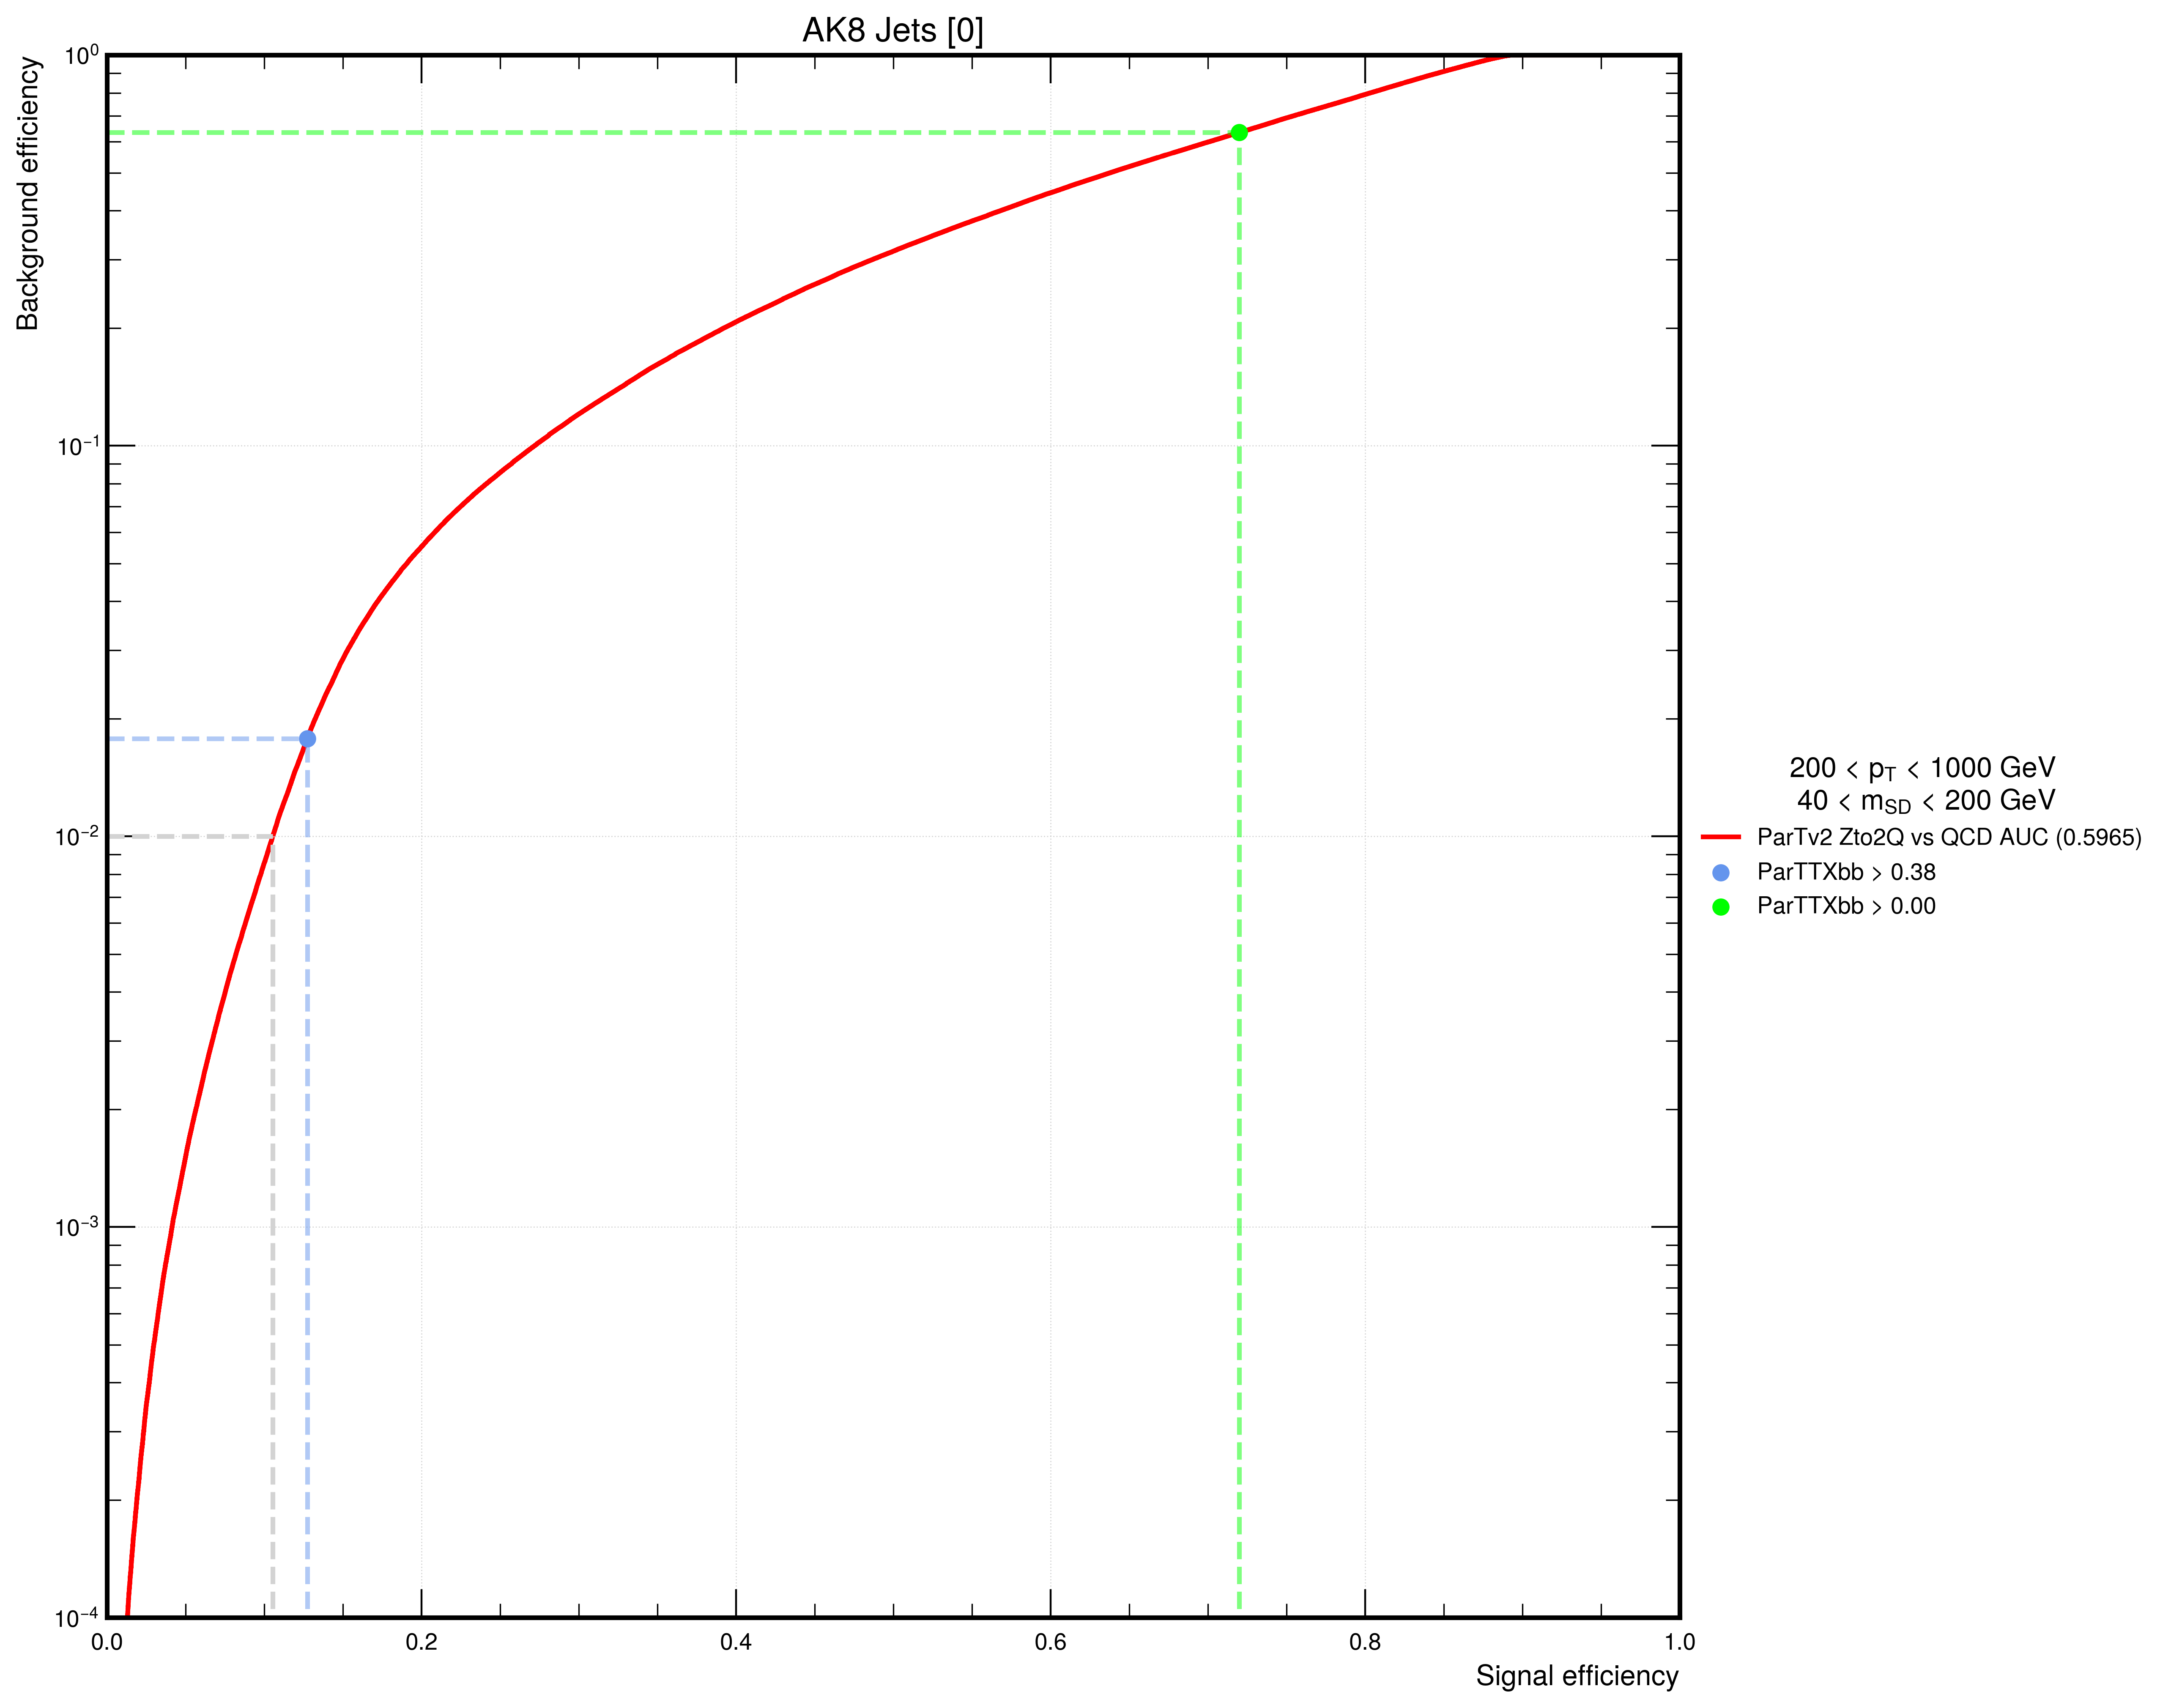

In [11]:
plotting.multiROCCurveGrey(
    {"bb": rocs},
    # sig_effs=[0.6],
    sig_effs=[],
    bkg_effs=[0.01],
    xlim=[0, 1.0],
    ylim=[1e-4, 1],
    show=True,
    plot_dir=Path(plot_dir),
    name=f"{jet_collection}{jet_coll_pnet}ROC{''.join(str(x) for x in jet_indices)}_{cut_str}_{signal}_{background}",
    title=(
        f"AK8 Jets {jet_indices}"
        if jet_collection == "ak8FatJet"
        else f"bb Jets {jet_indices}"
    ),
    legtitle=legtitle,
    plot_thresholds=plot_thresholds,
    find_from_sigeff=find_from_sigeff,
)

In [10]:
from sklearn.metrics import roc_curve

# Ground truth labels (1 = positive, 0 = negative)
y_true = [0, 0, 1, 1]

# Predicted probabilities for the positive class
y_score = [0.1, 0.4, 0.35, 0.8]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_score)

print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)

FPR: [0.  0.  0.5 0.5 1. ]
TPR: [0.  0.5 0.5 1.  1. ]
Thresholds: [ inf 0.8  0.4  0.35 0.1 ]
